In [12]:
from data.mnist import load_mnist, partition_dataset
from train.pipeline.trainer import FederatedTrainer

[Cliente 0] Cargando modelo desde disco.
[Cliente 0] Accuracy en test global: 0.8256
              precision    recall  f1-score   support

           0     0.9486    0.9224    0.9353       980
           1     0.9099    0.9612    0.9349      1135
           2     0.8623    0.8256    0.8436      1032
           3     0.7449    0.8703    0.8027      1010
           4     0.8343    0.8513    0.8427       982
           5     0.8266    0.7108    0.7643       892
           6     0.9371    0.8090    0.8683       958
           7     0.6476    0.9601    0.7735      1028
           8     0.9025    0.5893    0.7130       974
           9     0.7835    0.7175    0.7491      1009

    accuracy                         0.8256     10000
   macro avg     0.8398    0.8218    0.8228     10000
weighted avg     0.8395    0.8256    0.8246     10000



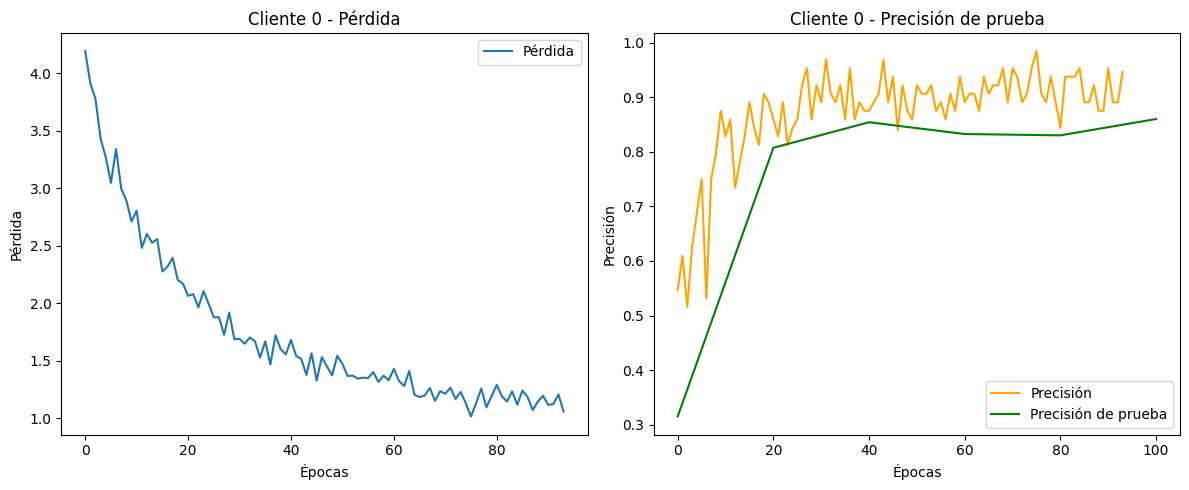

[Cliente 1] Cargando modelo desde disco.
[Cliente 1] Accuracy en test global: 0.8902
              precision    recall  f1-score   support

           0     0.9200    0.9735    0.9460       980
           1     0.9196    0.9877    0.9524      1135
           2     0.8781    0.8798    0.8790      1032
           3     0.9093    0.8238    0.8644      1010
           4     0.8763    0.9236    0.8994       982
           5     0.9571    0.6996    0.8083       892
           6     0.8790    0.9635    0.9193       958
           7     0.9391    0.8696    0.9030      1028
           8     0.8241    0.8419    0.8329       974
           9     0.8272    0.9108    0.8670      1009

    accuracy                         0.8902     10000
   macro avg     0.8930    0.8874    0.8872     10000
weighted avg     0.8929    0.8902    0.8887     10000



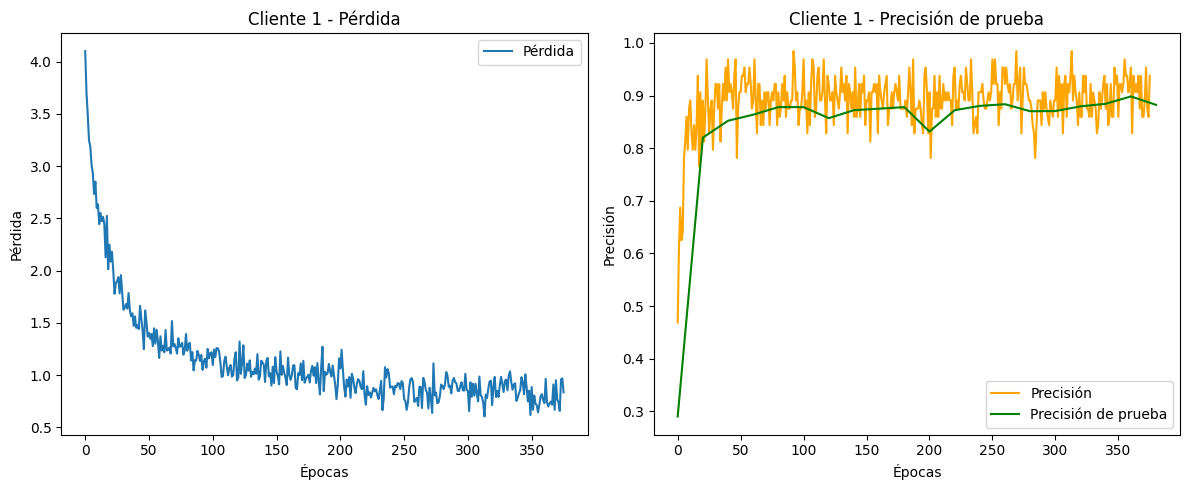

[Cliente 2] Cargando modelo desde disco.
[Cliente 2] Accuracy en test global: 0.8770
              precision    recall  f1-score   support

           0     0.8944    0.9765    0.9337       980
           1     0.9073    0.9833    0.9438      1135
           2     0.8910    0.8556    0.8730      1032
           3     0.7614    0.9129    0.8303      1010
           4     0.9730    0.7719    0.8609       982
           5     0.9489    0.7489    0.8371       892
           6     0.8375    0.9520    0.8911       958
           7     0.9211    0.8852    0.9028      1028
           8     0.8103    0.8419    0.8258       974
           9     0.8898    0.8167    0.8517      1009

    accuracy                         0.8770     10000
   macro avg     0.8835    0.8745    0.8750     10000
weighted avg     0.8833    0.8770    0.8763     10000



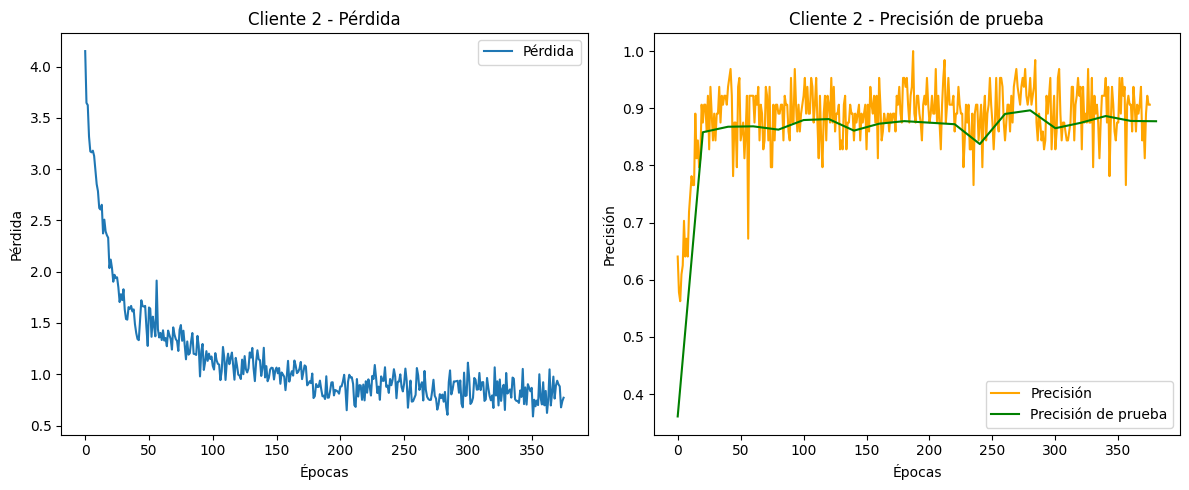

[Cliente 3] Cargando modelo desde disco.
[Cliente 3] Accuracy en test global: 0.8679
              precision    recall  f1-score   support

           0     0.8523    0.9776    0.9106       980
           1     0.9643    0.9753    0.9698      1135
           2     0.9494    0.8188    0.8793      1032
           3     0.9692    0.6851    0.8028      1010
           4     0.8641    0.8870    0.8754       982
           5     0.7131    0.9002    0.7958       892
           6     0.8218    0.9436    0.8785       958
           7     0.8968    0.9134    0.9051      1028
           8     0.8971    0.6982    0.7852       974
           9     0.8111    0.8722    0.8405      1009

    accuracy                         0.8679     10000
   macro avg     0.8739    0.8671    0.8643     10000
weighted avg     0.8774    0.8679    0.8666     10000



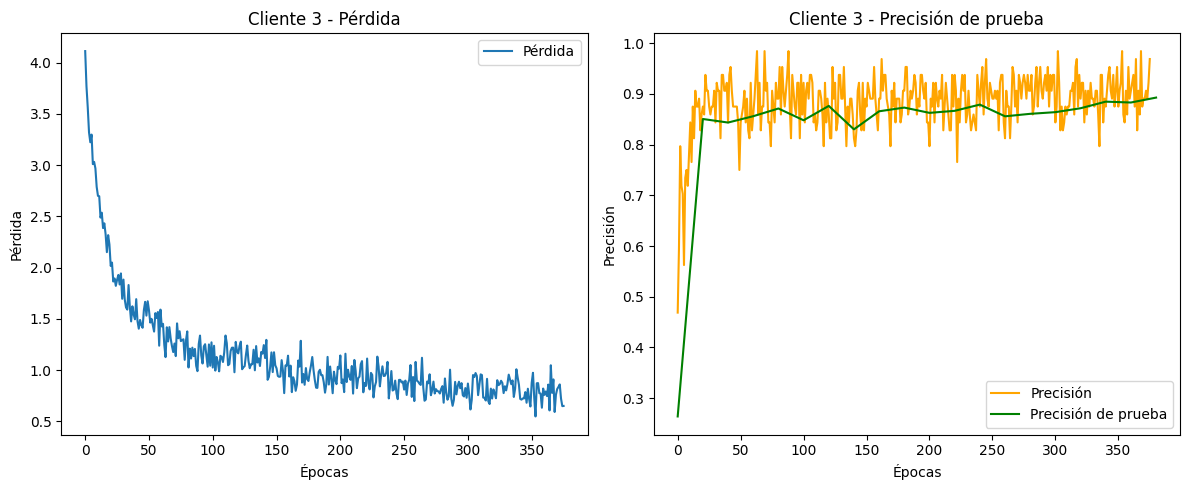

[Cliente 4] Cargando modelo desde disco.
[Cliente 4] Accuracy en test global: 0.8776
              precision    recall  f1-score   support

           0     0.9075    0.9816    0.9431       980
           1     0.9655    0.9621    0.9638      1135
           2     0.9290    0.8362    0.8802      1032
           3     0.8912    0.7782    0.8309      1010
           4     0.8617    0.9450    0.9014       982
           5     0.7089    0.8711    0.7817       892
           6     0.9583    0.8633    0.9083       958
           7     0.8609    0.9154    0.8873      1028
           8     0.8102    0.7669    0.7880       974
           9     0.9007    0.8454    0.8722      1009

    accuracy                         0.8776     10000
   macro avg     0.8794    0.8765    0.8757     10000
weighted avg     0.8824    0.8776    0.8778     10000



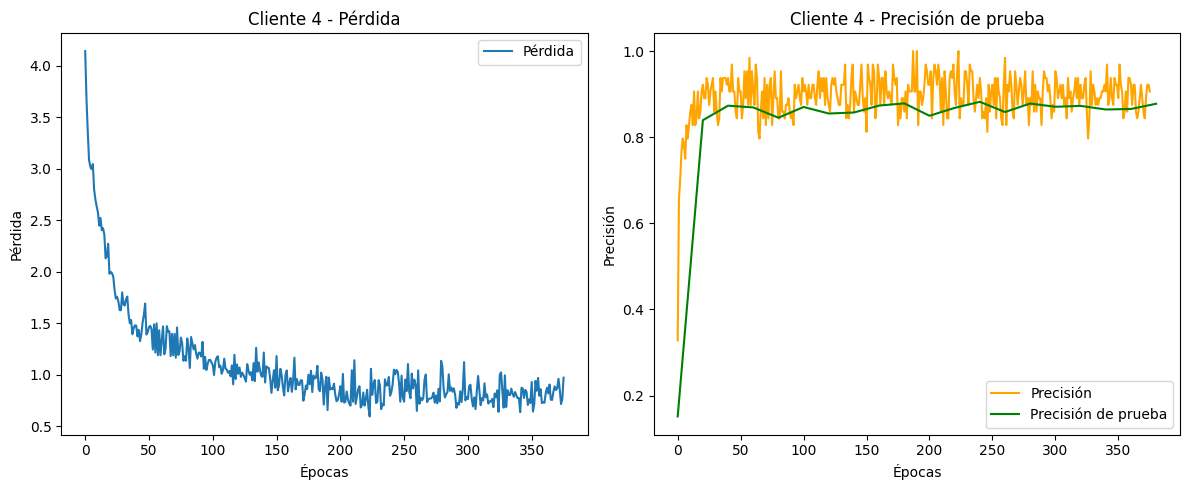


--- Reporte por Cliente ---
Cliente 0: 0.8256
Cliente 1: 0.8902
Cliente 2: 0.8770
Cliente 3: 0.8679
Cliente 4: 0.8776
Promedio individual: 0.8677


In [13]:

train_data, test_data = load_mnist()
client_data = partition_dataset(train_data, num_clients=5)

federated = FederatedTrainer(client_data, test_data)
federated.train_or_load_clients(epochs = 2, v=True)

federated.report()

In [14]:
# FedAvg simple
model_avg = federated.aggregate_simple()
federated.evaluate_global(model_avg, name='Modelo combinado (FedAvg simple)')
# [Classification report] (opcional)
federated.classification_report(model_avg)

# FedAvg ponderado (por accuracy)
model_weighted = federated.aggregate_weighted(federated.accuracies)
federated.evaluate_global(model_weighted, name='Modelo combinado (FedAvg ponderado)')
# [Classification report] (opcional)
federated.classification_report(model_weighted)

# Ensamble bayesiano
model_ensemble = federated.build_ensemble_model(top_k=3)
federated.evaluate_global(model_ensemble, name='Modelo combinado (Ensamble bayesiano)')
# [Classification report] (opcional)
federated.classification_report(model_ensemble)

# Imprimir el baseline del promedio de los modelos
print (f'Baseline: {sum(federated.accuracies) / len(federated.accuracies)}')

[Global] Modelo combinado (FedAvg simple) Accuracy en test global: 0.8565
              precision    recall  f1-score   support

           0     0.9424    0.9347    0.9385       980
           1     0.9092    0.9877    0.9468      1135
           2     0.8940    0.8828    0.8883      1032
           3     0.9449    0.7644    0.8451      1010
           4     0.8702    0.8809    0.8755       982
           5     0.7425    0.8016    0.7709       892
           6     0.8306    0.9676    0.8939       958
           7     0.7567    0.9377    0.8375      1028
           8     0.9585    0.4979    0.6554       974
           9     0.8038    0.8811    0.8407      1009

    accuracy                         0.8565     10000
   macro avg     0.8653    0.8536    0.8493     10000
weighted avg     0.8668    0.8565    0.8516     10000

[Global] Modelo combinado (FedAvg ponderado) Accuracy en test global: 0.8595
              precision    recall  f1-score   support

           0     0.9437    0.9408  